In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import numpy.random as npr
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%precision 4


'%.4f'

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

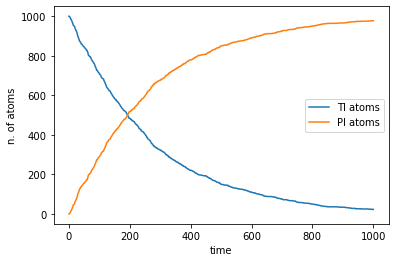

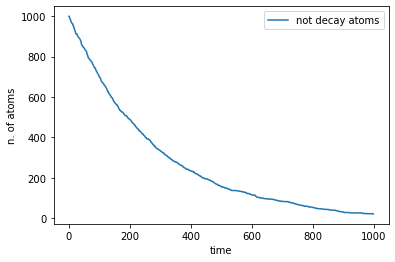

In [7]:
tau=3.052*60

def prob(t):
    p=1-pow(2,-t/tau)
    return p

n_TI=1000
v_TI=[]
v_PI=[]
v_PI.append(0)
v_TI.append(1000)
rand_v=npr.rand(n_TI,1)
for t in range(1000):
    p=prob(t)
    decay=rand_v[rand_v<p]
    v_TI.append(n_TI-len(decay))
    v_PI.append(len(decay))
    
plt.plot(range(len(v_TI)),v_TI,label='TI atoms')
plt.plot(range(len(v_PI)),v_PI,label='PI atoms')
plt.xlabel('time')
plt.ylabel('n. of atoms')
plt.legend()
plt.show()

def prob_1(t):
    tau=3.052*60
    p=pow(2,-tau/t)*np.log(2)/tau
    return p

v_TI_1=[]
v_PI_1=[]
v_PI_1.append(0)
v_TI_1.append(1000)
n_TI_1=1000



def expon_icdf(z, mu=np.log(2)/tau):
    """Inverse CDF of exponential distribution - i.e. quantile function."""
    return -np.log(1-z)/mu

rand_v_1=npr.rand(n_TI_1,1)
rand_v_1=expon_icdf(rand_v_1)

for t in range(1,1000):
    decay_1=rand_v_1[rand_v_1<t]
    v_TI_1.append(n_TI_1-len(decay_1))
    v_PI_1.append(len(decay_1))
    
    

plt.plot(range(len(v_TI_1)),v_TI_1,label='not decay atoms')
plt.xlabel('time')
plt.ylabel('n. of atoms')
plt.legend()
plt.show()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [8]:
Z,E=79,7.7
e =  1.44 *2.
a_0 = 5.29e4


part = 1000000
x = np.random.normal(0, a_0 / 100, part)
y = np.random.normal(0, a_0 / 100, part)

def theta(x, y, Z, E):
    b = np.sqrt(x**2 + y**2)
    return 2 * np.arctan((Z * e) / (E * b))

theta_ = theta(x, y, Z, E)

thetas_back = theta_[theta_ > np.pi/2]

print("the fraction of particles that 'bounce back' is:",thetas_back.shape[0]/part)

the fraction of particles that 'bounce back' is: 0.00151


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [13]:
def fun(x):
    f=pow(np.sin(1/(2*x-x**2)),2)
    return f
a,b=0,2
h=fun(2.1)
N=1000
N_1=0
for i in range(N):
    x=(b-a)*npr.rand(1,1)+a
    y=npr.rand(1,1)*h
    if y<fun(x):
        N_1+=1
I=(b-a)*h*(N_1/N)
err=h*(b-a)*pow((N_1/N)*(1-(N_1/N))/N,0.5)
print('the integral value with hit/miss is {}, with an error of {}'.format(I,err))

f_=[fun(x) for x in (b-a)*npr.rand(N,1)+a]
err_1=pow(np.var(f_)/N,0.5)
f_=sum(f_)
I_1=(b-a)*f_/N
print('the integral value with the mean value method is {}, with an error of {}'.format(float(I_1),err_1))
err_p=err/I
err1_p=float(err_1/I_1)
print('the two errors are {}% and {}%, risp. for hit/miss and m.v.m., so we in this case the mean value method is a better estimator.'.format(err_p,err1_p))

the integral value with hit/miss is 1.4544281777789678, with an error of 0.02804226965433245
the integral value with the mean value method is 1.437756473094996, with an error of 0.00852957191726156
the two errors are 0.019280614940474623% and 0.005932556783347544%, risp. for hit/miss and m.v.m., so we in this case the mean value method is a better estimator


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [5]:
def fun(x,y):
    if pow(x,2)+pow(y,2) <= 1:
        f=1
    else:
        f=0
    return f
a,b=0,1
h=1
N_1=0
N=100000
for i in range(N):
    x=(b-a)*npr.rand(1,1)+a
    y=(b-a)*npr.rand(1,1)+a
    if fun(x,y)==1:
        N_1+=1
I=(b-a)*h*(N_1/N)

f_=sum([fun(x,y) for x,y in (b-a)*npr.rand(N,2)+a])
I_1=(b-a)*f_/N
print('the area of a circle with r=1 is {} using hit/miss and is {} with the mean value metod, {} iterations'
      .format(I*4,I_1*4,N))


dim=10
count=0

for i in range(N):
    x=npr.uniform(-1.0,1.0,dim)
    r=np.sum(x**2)
    if r<=1:
        count+=1
V=(count/N)*pow(2,dim)
print('the volume of an 10D sphere is:',V)
    

the area of a circle with r=1 is 3.14388 using hit/miss and is 3.1404 with the mean value metod, 100000 iterations
the volume of an 10D sphere is: 2.7136


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [14]:
from math import exp
a,b=0,1
N=10000
def fun(x):
    f=pow(x,-0.5)/(exp(x)+1)
    return f
def w(x):
    w=pow(x,-0.5)
    return w
x=(b-a)*npr.rand(N,1)+a
f_w=sum([fun(i**2)/w(i**2) for i in x])
w_=sum([w(i) for i in x])
I=(1/N)*(f_w)*(w_/N)
print('the value of the integral is',float(I))

the value of the integral is 0.8382931069312122
